#### PREPROCESSING DATA

##### Cleaning

In [1]:
import string, re

def cleansing(data):
    # lower text
    data = data.lower()
    data = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', data)   
    #menghilangkan \...
    data = re.sub(r'\\[^\s]+',' ',data) 
    #menghilangkan #hashtag
    data = re.sub(r'#([^\s]+)', ' ', data)
    #menghilangkan @username
    data = re.sub(r'@[^\s]+',' ',data)
    #menghilangkan RT
    data = re.sub(r'rt ', ' ', data)
    #menghilangkan tanda baca
    data = re.sub(r'[^\w]|_',' ',data)
    #menghilangkan anga
    data = re.sub(r"\d+", " ", data)
    #menghilangkan spasi yang berlebih
    data = re.sub(r'[\s]+', ' ', data)
    
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    
    # remove newline
    data = data.replace('\n', ' ')
    
    return data

##### Stemming

In [2]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(data):
    data = stemmer.stem(data)
    return data

##### Tokenize

In [3]:
from nltk.tokenize import TweetTokenizer
Tokenizing = TweetTokenizer()
    
def tokenisasi(data):
    data = Tokenizing.tokenize(data)
    return data

##### Stopwords Removal

In [4]:
import nltk
import pandas as pd
from nltk.corpus import stopwords

# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['gue', 'gua', 'w', 'we', 'gw', 'ga', 'aja', 'saja','kaya', 'kayak', 'yg', 'yang', 'aku', 'wkwk', 'jg', 'jadi',
                 'si', 'di', 'kali', 'ye', 'lo', 'loe', 'trs', 'jd', 'lg', 'lagi','ama', 'sama', 'lah', 'kek', 'gak', 'gada', 'wkwkwkw', 'wkwkwwk',
                 'gaada', 'gw', 'gg', 'aduh', 'ah', 'iya', 'cuman', 'cuma', 'tp', 'tapi', 'aja', 'kalau', 'yu', 'wkakak', 'wah','wahhh',
                 'ka', 'kak', 'dah', 'deh', 'krn', 'dek', 'kyk', 'mau', 'plis', 'sama', 'yes', 'bs', 'ye','lha','loh','lu','kian',
                 'ni', 'in', 'ini', 'gk', 'ada', 'gak', 'mas', 'd', 'elah', 'aj', 'za', 'mo', 'kl', 'mah', 'nya', 'to', 'ha','siss',
                 'ak', 'drpd', 'huf', 'pas', 'sama', 'situ', 'yah', 'klo', 'u', 'i', 'nii', 'tpi', 'ku', 'ato', 'wkwkw', 'hadeh',
                 'dong', 'doang', 'apa', 'ada', 'masa', 'hahaha', 'tadi', 'gajadi', 'sini', 'sih', 'mau', 'pake', 'dulu','gin',
                 'gatau', 'utk', 'udah', 'dehh', 'gw', 'kalo', 'ingin', 'terus', 'bukan', 'punya', 'seperti', 'egk', 'buat', 
                 'akan', 'maka', 'gitu', 'punya', 'di', 'gabisa', 'nda', 'yak', 'dr', 'dari', 'tb', 'selalu', 'tau', 'yg', 
                 'yaa', 'lg', 'lagi', 'ini', 'eh', 'ma', 'malah', 'jangan', 'oke', 'kalau', 'yh', 'walaupun', 'wlopun', 'neh',
                 'teh', 'sm', 'sdh', 'ngeh', 'aq', 'atau', 'itu', 'dia', 'tadi', 'belum', 'buat', 'apasih', 'bgt', 'malah', 'ya',
                 'tuh', 'sudah', 'ken', 'segini', 'kak', 'bagaimana', 'biar', 'sudah', 'tuh', 'memang', 'bagaimana', 'enggak', 'nggak',
                  'kk', 'kaak', 'kaaa', 'kakk', 'kakkkkk', 'ngga', 'gk', 'gbs', 'gak', 'gda', 'engga', 'gakk','tidak', 'nih','eh', 'btw',
                  'ngk', 'gx', 'segini','dll','asa','via','rang','hahahahahahah','woy','sih','kes','seh','n'])

txt_stopword = pd.read_csv("D:/O2122121 Adms/Kuliah/Project Flask/hate-speech-and-abusive-language detection/stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)

# remove stopword pada list token
def stopword(data):
    return [word for word in data if word not in list_stopwords]

##### Language Normalization & Check Duplicated

In [5]:
import pandas as pd

normalisasi = pd.read_csv("D:/O2122121 Adms/Kuliah/Project Flask/hate-speech-and-abusive-language detection/kamusalay.csv",encoding='utf-8')
normalisasi_dict = {}

for index, row in normalisasi.iterrows():
    if row[0] not in normalisasi_dict:
        normalisasi_dict[row[0]] = row[1]

def normalisasi(data):
    return [normalisasi_dict[term] if term in normalisasi_dict else term for term in data]

In [6]:
def joinstring(data): # Convert list of words into sentence
    sentence = ' '.join(word for word in data)
    return sentence

##### Execution Preprocessing Data

In [7]:
def preprocessing(text):
    hasil = joinstring(normalisasi(stopword(tokenisasi(stemming(cleansing(text))))))
    return hasil

##### Example Preprocessing Data

In [8]:
#Testing Example Preprocessing Data
twt = """Vaksin bukan hanya tentang melindungi diri sendiri .. Tapi juga org - org disekitarmu :)
        #vaksincovid19 #VaksinCorona https://t.co/hSXqXEDqK8"""

preprocessing(twt)

'vaksin lindung'

In [9]:
import pandas as pd
col_names = ['Text','Label']
data = pd.read_csv('D:/O2122121 Adms/Kuliah/Project Flask/TrainingPreprocess.tsv', sep='\t',names=col_names, header=None)
data

,Text,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [10]:
review = []
for index, row in data.iterrows():
    review.append(preprocessing(row["Text"]))
    
data["Text"] = review
data.head()

,Text,Label
0,warung milik usaha pabrik puluh kenal putih ba...,positive
1,ulama lurus mmbri hujjah partai diwlh suara is...,neutral
2,lokasi strategis jalan sumatra bandung nyaman ...,positive
3,betapa bahagia unboxing paket barang bagus beli,positive
4,mahasiswa sombong kasih kartu kuning ajar poli...,negative


In [11]:
data

,Text,Label
0,warung milik usaha pabrik puluh kenal putih ba...,positive
1,ulama lurus mmbri hujjah partai diwlh suara is...,neutral
2,lokasi strategis jalan sumatra bandung nyaman ...,positive
3,betapa bahagia unboxing paket barang bagus beli,positive
4,mahasiswa sombong kasih kartu kuning ajar poli...,negative
...,...,...
10995,kecewa,positive
10996,masakan kepiting senang pilih kepiting segar m...,positive
10997,hormat partai partai koalisi,neutral
10998,pagi pagi tol pasteur macet parah bikin jengkel,negative


In [29]:
text = data['Text']
polarity_encode = {'negative' : 0, 'neutral' : 1, 'positive' : 2}
y = data['Label'].map(polarity_encode).values

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000, smooth_idf=False)
X_Tfidf = Tfidf_vect.fit_transform(text).toarray()

In [30]:
name_columns = Tfidf_vect.get_feature_names()
name_columns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abad',
 'abai',
 'abal',
 'abang',
 'abdi',
 'abdul',
 'absen',
 'abu',
 'abuba',
 'ac',
 'acar',
 'acara',
 'aceh',
 'acer',
 'achmad',
 'aci',
 'acoustic',
 'acuh',
 'acung',
 'ada',
 'adab',
 'adam',
 'adat',
 'addictea',
 'adegan',
 'adem',
 'adhi',
 'adidas',
 'adik',
 'adil',
 'adit',
 'admin',
 'administrasi',
 'adon',
 'adu',
 'aduhai',
 'aduk',
 'advisor',
 'afdal',
 'affogato',
 'affordable',
 'afrika',
 'afternoon',
 'agak',
 'agam',
 'agama',
 'agen',
 'agenda',
 'aglio',
 'agung',
 'agus',
 'agustus',
 'ahimsa',
 'ahli',
 'ahmad',
 'ahmadiyah',
 'ahok',
 'ahoker',
 'aib',
 'air',
 'airlangga',
 'aisya',
 'ajaib',
 'ajak',
 'ajang',
 'ajar',
 'aju',
 'akal',
 'akang',
 'akar',
 'akbar',
 'akhir',
 'akhirat',
 'aki',
 'akibat',
 'akomodasi',
 'akses',
 'aksi',
 'aktif',
 'akting',
 'aktivasi',
 'aktivis',
 'aktivitas',
 'akun',
 'akustik',
 'al',
 'ala',
 'alakadar',
 'alam',
 'alamat',
 'alami',
 'alamin',
 'alas',
 'alat',
 'alay',
 'album',
 'alcohol',
 'alergi',
 'alfa

In [33]:
X_Tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
tfidf_matrix = pd.DataFrame(X_Tfidf, columns=name_columns)
tfidf_matrix

,abad,abai,abal,abang,abdi,abdul,absen,abu,abuba,ac,...,zenfone,zikir,zionis,zon,zona,zone,zoo,zoom,zupa,zuppa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_Tfidf, y, test_size = 0.2, stratify=y, random_state=45)

In [14]:
from sklearn.neural_network import MLPClassifier

mlp_classifier  = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [15]:
predict_train = mlp_classifier.predict(X_train)
predict_test = mlp_classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))

[[2678    1   70]
 [   4  913    1]
 [  22    2 5109]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2749
           1       1.00      0.99      1.00       918
           2       0.99      1.00      0.99      5133

    accuracy                           0.99      8800
   macro avg       0.99      0.99      0.99      8800
weighted avg       0.99      0.99      0.99      8800



In [17]:
X_sample = ['hidup sangat susah ya sekarang dan banyak orang toxic']
tags = ["Negative","Neutral","Positive"]
X_sample = Tfidf_vect.transform(X_sample) 
pred = mlp_classifier.predict(X_sample)
print("\nReview is",tags[pred[0]])


Review is Negative


In [18]:
X_sample1 = ['saya selalu senang dengan pekerjaan yang saya minati']
tags = ["Negative","Neutral","Positive"]
X_sample1 = Tfidf_vect.transform(X_sample1) 
pred = mlp_classifier.predict(X_sample1)
print("\nReview is",tags[pred[0]])


Review is Positive


In [19]:
otherData = pd.DataFrame()
otherData['text'] = ['enaknya kuliah online,  ga perlu capek" ke kampus dan bisa santai dirumah',
                     'Tapi serius deh semakin kesini ngerasa kuliah online makin ga efektif, ga paham materi blasss, kopong, berasa yauda kek ga kuliah',
                     'dosen tidak mengajarkan yang lebih baik, karena jarang mengajar ke kampus sehingga mahasiswa jadi kurang ilmu',
                     'mau jadi orang baik aja susah bangat banyak rintangannya, ada aja yang suka toxic dan nyinyir'
                    ]

otherData['text_clean'] = otherData['text'].apply(preprocessing)
otherData

,text,text_clean
0,"enaknya kuliah online, ga perlu capek"" ke kam...",kuliah online cape kampus santai rumah
1,Tapi serius deh semakin kesini ngerasa kuliah ...,serius kesini merasa kuliah online efektif pah...
2,"dosen tidak mengajarkan yang lebih baik, karen...",dosen ajar jarang ajar kampus mahasiswa ilmu
3,mau jadi orang baik aja susah bangat banyak ri...,susah banget rintang suka toxic nyinyir


In [20]:
X_otherData = otherData['text_clean']
X_otherData = Tfidf_vect.transform(X_otherData) 
y_pred_otherData = mlp_classifier.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Neutral', 2 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

,text,text_clean,Result Prediction
0,"enaknya kuliah online, ga perlu capek"" ke kam...",kuliah online cape kampus santai rumah,Neutral
1,Tapi serius deh semakin kesini ngerasa kuliah ...,serius kesini merasa kuliah online efektif pah...,Positive
2,"dosen tidak mengajarkan yang lebih baik, karen...",dosen ajar jarang ajar kampus mahasiswa ilmu,Negative
3,mau jadi orang baik aja susah bangat banyak ri...,susah banget rintang suka toxic nyinyir,Negative


In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
#           'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
#           'solver': ['adam', 'sgd', 'lbfgs'],
#           'learning_rate' : ['constant', 'adaptive', 'invscaling']
#          }

# mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=10), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# mlp_classif_grid.fit(X_train,Y_train)

# print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, Y_train))
# print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, Y_test))
# print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
# print('Best Parameters : ',mlp_classif_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
# predict = mlp_classif_grid.predict(X_train)
# print(confusion_matrix(Y_train,predict))
# print(classification_report(Y_train,predict))

In [24]:
from sklearn.model_selection import GridSearchCV
 
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)], 
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(MLPClassifier(max_iter=100), parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train,Y_train)

print('Train Accuracy : %.3f'%clf.best_estimator_.score(X_train, Y_train))
print('Test Accuracy : %.3f'%clf.best_estimator_.score(X_test, Y_test))
print('Best Accuracy Through Grid Search : %.3f'%clf.best_score_)
print('Best Parameters : ',clf.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy : 0.899
Test Accuracy : 0.826
Best Accuracy Through Grid Search : 0.830
Best Parameters :  {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [25]:
X_sample = ['hidup sangat susah ya sekarang dan banyak orang toxic']
tags = ['NEGATIVE','NETRAL','POSITIVE']
X_sample = Tfidf_vect.transform(X_sample) 
pred = clf.predict(X_sample)
print("\nReview is",tags[pred[0]])


Review is NEGATIVE


In [26]:
import joblib
joblib.dump(Tfidf_vect, 'tfidfVectorizer.pkl')
joblib.dump(clf, 'classifier.pkl')

['classifier.pkl']

In [27]:
import joblib
tfidf = joblib.load('tfidfVectorizer.pkl')
loaded_model = joblib.load('classifier.pkl')

In [31]:
X_sample = ['saya senang dengan posisi saya bekerja']
tags = ['NEGATIVE','NETRAL','POSITIVE']
X_sample = tfidf.transform(X_sample) 
pred = loaded_model.predict(X_sample)
print("\nReview is",tags[pred[0]])


Review is POSITIVE


In [32]:
otherData = pd.DataFrame()
otherData['text'] = ['enaknya kuliah online,  ga perlu capek" ke kampus dan bisa santai dirumah',
                     'Tapi serius deh semakin kesini ngerasa kuliah online makin ga efektif, ga paham materi blasss, kopong, berasa yauda kek ga kuliah',
                     'dosen tidak mengajarkan yang lebih baik, karena jarang mengajar ke kampus sehingga mahasiswa jadi kurang ilmu',
                     'mau jadi orang baik aja susah bangat banyak rintangannya, ada aja yang suka toxic dan nyinyir'
                    ]

otherData['text_clean'] = otherData['text'].apply(preprocessing)
otherData

,text,text_clean
0,"enaknya kuliah online, ga perlu capek"" ke kam...",kuliah online cape kampus santai rumah
1,Tapi serius deh semakin kesini ngerasa kuliah ...,serius kesini merasa kuliah online efektif pah...
2,"dosen tidak mengajarkan yang lebih baik, karen...",dosen ajar jarang ajar kampus mahasiswa ilmu
3,mau jadi orang baik aja susah bangat banyak ri...,susah banget rintang suka toxic nyinyir


In [33]:
X_otherData = otherData['text_clean']
X_otherData = tfidf.transform(X_otherData) 
y_pred_otherData = loaded_model.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Neutral', 2 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

,text,text_clean,Result Prediction
0,"enaknya kuliah online, ga perlu capek"" ke kam...",kuliah online cape kampus santai rumah,Negative
1,Tapi serius deh semakin kesini ngerasa kuliah ...,serius kesini merasa kuliah online efektif pah...,Negative
2,"dosen tidak mengajarkan yang lebih baik, karen...",dosen ajar jarang ajar kampus mahasiswa ilmu,Negative
3,mau jadi orang baik aja susah bangat banyak ri...,susah banget rintang suka toxic nyinyir,Negative


In [12]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [13]:
category = pd.get_dummies(data.Label)
df_baru = pd.concat([data, category], axis=1)
df_baru = df_baru.drop(columns='Label')
df_baru

,Text,negative,neutral,positive
0,warung milik usaha pabrik puluh kenal putih ba...,0,0,1
1,ulama lurus mmbri hujjah partai diwlh suara is...,0,1,0
2,lokasi strategis jalan sumatra bandung nyaman ...,0,0,1
3,betapa bahagia unboxing paket barang bagus beli,0,0,1
4,mahasiswa sombong kasih kartu kuning ajar poli...,1,0,0
...,...,...,...,...
10995,kecewa,0,0,1
10996,masakan kepiting senang pilih kepiting segar m...,0,0,1
10997,hormat partai partai koalisi,0,1,0
10998,pagi pagi tol pasteur macet parah bikin jengkel,1,0,0


In [14]:
x = df_baru['Text'].values
y = df_baru[['negative', 'neutral', 'positive']].values

In [15]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x)

In [16]:
sekuens_x = tokenizer.texts_to_sequences(x)

In [17]:
padded_x = pad_sequences(sekuens_x)

In [35]:
padded_x

array([[   0,    0,    0, ...,  240,  255, 1541],
       [   0,    0,    0, ...,  101,  979,  979],
       [   0,    0,    0, ..., 1010,  119, 4307],
       ...,
       [   0,    0,    0, ...,   58,   58,  947],
       [   0,    0,    0, ...,  421,   61, 1695],
       [   0,    0,    0, ...,   73,  680,    2]])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(padded_x, y, stratify = y, test_size=0.2, random_state = 4)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import L1L2

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128),
    
    tf.keras.layers.LSTM(128),
        
    tf.keras.layers.Dense(128, kernel_regularizer=L1L2(l1=0.01, l2=0.01), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(128, kernel_regularizer=L1L2(l1=0, l2=0.01), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(128, kernel_regularizer=L1L2(l1=0, l2=0.01), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(128, kernel_regularizer=L1L2(l1=0, l2=0.01), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(128, kernel_regularizer=L1L2(l1=0, l2=0.01), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),    
    
    tf.keras.layers.Dense(3, activation='softmax')
])


In [20]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_categorical_accuracy') > 0.80 ):
            self.model.stop_training = True

callbacks = myCallback()

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['categorical_accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                        

In [22]:
%%time
num_epochs = 1000
fit = model.fit(x_train, 
                y_train, 
#                 batch_size = 16,
                epochs=num_epochs, 
                validation_data=(x_test, y_test),
#                 validation_split=0.2,       
                callbacks = [callbacks]
)

Epoch 1/1000
275/275 [==============================] - 35s 88ms/step - loss: 11.3914 - categorical_accuracy: 0.6539 - val_loss: 5.1629 - val_categorical_accuracy: 0.5832
Epoch 2/1000
275/275 [==============================] - 23s 82ms/step - loss: 3.0300 - categorical_accuracy: 0.7939 - val_loss: 2.1913 - val_categorical_accuracy: 0.7345
Epoch 3/1000
275/275 [==============================] - 25s 91ms/step - loss: 1.4311 - categorical_accuracy: 0.8568 - val_loss: 1.1568 - val_categorical_accuracy: 0.8100
CPU times: total: 3min 45s
Wall time: 1min 25s


In [23]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

275/275 [==============================] - 8s 29ms/step - loss: 1.0045 - categorical_accuracy: 0.9015
Training Accuracy: 0.9015
Testing Accuracy:  0.8100


<Figure size 640x480 with 0 Axes>

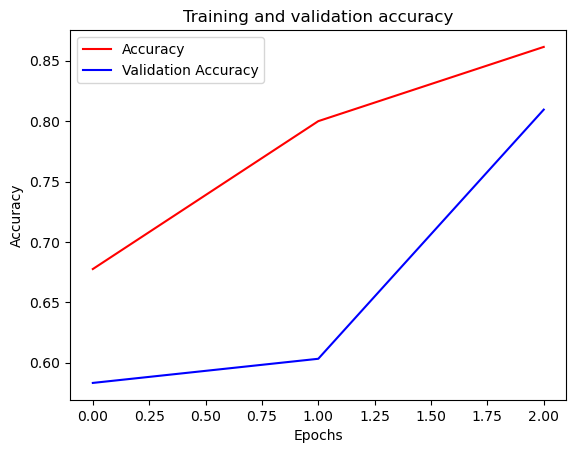

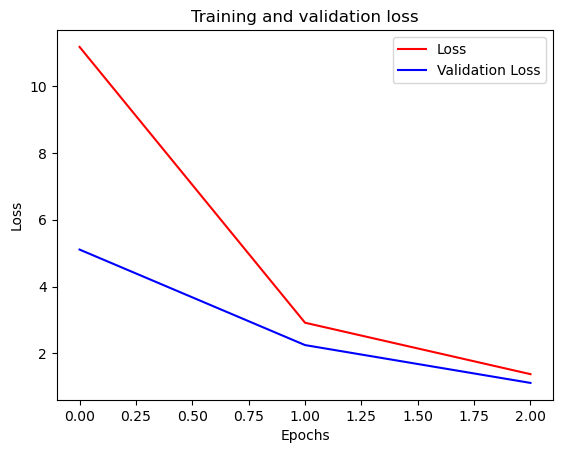

<Figure size 640x480 with 0 Axes>

In [47]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=fit.history['categorical_accuracy']
val_acc=fit.history['val_categorical_accuracy']
loss=fit.history['loss']
val_loss=fit.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

# Plot training and validation loss per epoch

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

In [48]:
import numpy as np 

new_complaint = ['penyebar hoax bodoh'] 
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=128)
pred = model.predict(padded)
labels = ['NEGATIVE','NETRAL','POSITIVE']
print(pred)
print(labels[np.argmax(pred)])

1/1 [==============================] - 1s 1s/step
[[0.72320616 0.09461615 0.18217765]]
NEGATIVE


In [49]:
new_complaint = ['saya selalu senang dengan pekerjaan yang saya minati']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=128)
pred = model.predict(padded)
labels = ['NEGATIVE','NETRAL','POSITIVE']
print(pred)
print(labels[np.argmax(pred)])

1/1 [==============================] - 0s 43ms/step
[[0.11402371 0.27600542 0.6099708 ]]
POSITIVE


In [50]:
model.save("ModelLSTM.h5")

In [51]:
import joblib
joblib.dump(tokenizer, 'Tokenizer.pkl') 

['Tokenizer.pkl']

In [52]:
import joblib
from keras.models import load_model
from keras_preprocessing.sequence import pad_sequences
import numpy as np 

Tokenizer = joblib.load('Tokenizer.pkl') 
ModelLSTM = load_model('ModelLSTM.h5')

In [53]:
new_complaint = ['buzzer jokowi memang suka memecah belah bangsa aja']
seq = Tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=128)
pred = ModelLSTM.predict(padded)
labels = ['NEGATIVE','NETRAL','POSITIVE']
print(pred)
print(labels[np.argmax(pred)])

1/1 [==============================] - 1s 1s/step
[[0.5605069  0.04474337 0.39474973]]
NEGATIVE


In [54]:
import pandas as pd 
otherData = pd.DataFrame()
otherData['text'] = ['enaknya kuliah online,  ga perlu capek" ke kampus dan bisa santai dirumah',
                     'Tapi serius deh semakin kesini ngerasa kuliah online makin ga efektif, ga paham materi blasss, kopong, berasa yauda kek ga kuliah',
                     'dosen tidak mengajarkan yang lebih baik, karena jarang mengajar ke kampus sehingga mahasiswa jadi kurang ilmu',
                     'mau jadi orang baik aja susah bangat banyak rintangannya, ada aja yang suka toxic dan nyinyir'
                    ]

otherData['text_clean'] = otherData['text'].apply(preprocessing)
otherData

,text,text_clean
0,"enaknya kuliah online, ga perlu capek"" ke kam...",kuliah online cape kampus santai rumah
1,Tapi serius deh semakin kesini ngerasa kuliah ...,serius kesini merasa kuliah online efektif pah...
2,"dosen tidak mengajarkan yang lebih baik, karen...",dosen ajar jarang ajar kampus mahasiswa ilmu
3,mau jadi orang baik aja susah bangat banyak ri...,susah banget rintang suka toxic nyinyir


In [55]:
X_otherData = otherData['text_clean']
X_otherData = Tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, maxlen=128) 

In [56]:
def find_sentiment(review):
    seq = Tokenizer.texts_to_sequences(review)
    padded = pad_sequences(seq, maxlen=128)
    pred = ModelLSTM.predict(padded)
    label = ['Negative','Neutral','Positive']
    return label[np.argmax(pred)]

In [57]:
otherData['predicted'] = otherData['text_clean'].apply(lambda x:find_sentiment([x]))
otherData

1/1 [==============================] - 0s 53ms/step


,text,text_clean,predicted
0,"enaknya kuliah online, ga perlu capek"" ke kam...",kuliah online cape kampus santai rumah,Positive
1,Tapi serius deh semakin kesini ngerasa kuliah ...,serius kesini merasa kuliah online efektif pah...,Positive
2,"dosen tidak mengajarkan yang lebih baik, karen...",dosen ajar jarang ajar kampus mahasiswa ilmu,Negative
3,mau jadi orang baik aja susah bangat banyak ri...,susah banget rintang suka toxic nyinyir,Negative


In [ ]:
# from keras_preprocessing.sequence import pad_sequences
# from keras.preprocessing.text import Tokenizer

In [ ]:
# tokenizer = Tokenizer(num_words=5000, oov_token='x')
# tokenizer.fit_on_texts(x)
# sekuens_x = tokenizer.texts_to_sequences(x)
# padded_x = pad_sequences(sekuens_x)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(padded_x, y, stratify = y, test_size=0.2, random_state = 45)

In [ ]:
# import tensorflow as tf
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(input_dim=5000, output_dim=128),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

# # Tentukan optimizer dan loss function model
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [ ]:
# class modelCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy')>0.9):
#             print("\nAkurasi telah mencapai >90%!")
#             self.model.stop_training = True
# my_callback = modelCallback()

In [ ]:
# hist = model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     epochs=20,
#     batch_size=128,
#     verbose=2,
#     callbacks=[my_callback])

In [ ]:
# import matplotlib.image  as mpimg
# import matplotlib.pyplot as plt

# acc=hist.history['accuracy']
# val_acc=hist.history['val_accuracy']
# loss=hist.history['loss']
# val_loss=hist.history['val_loss']

# epochs=range(len(acc)) # Get number of epochs

# # Plot training and validation accuracy per epoch

# plt.plot(epochs, acc, 'r')
# plt.plot(epochs, val_acc, 'b')
# plt.title('Training and validation accuracy')
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend(["Accuracy", "Validation Accuracy"])

# plt.figure()

# # Plot training and validation loss per epoch

# plt.plot(epochs, loss, 'r')
# plt.plot(epochs, val_loss, 'b')
# plt.title('Training and validation loss')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(["Loss", "Validation Loss"])

# plt.figure()

In [58]:
import pandas as pd

data = pd.read_csv("D:/O2122121 Adms/Kuliah/Project Flask/hate-speech-and-abusive-language detection/sample NN.csv")

In [59]:
data

,text
0,USER Joko Widodo dinilai sebagai presiden terl...
1,PELAJAR SMA KEC BILAH HILIR DEKLARASI ANTI HOA...
2,ajakan menolak berita hoax dan sukseskan pilka...
3,Anjir baru kali ini lihat orang bego mau debat...
4,saya mendukung program vaksin


In [60]:
review = []
for index, row in data.iterrows():
    review.append(preprocessing(row["text"]))
    
data['text cleaning'] = review
data.head()

,text,text cleaning
0,USER Joko Widodo dinilai sebagai presiden terl...,pengguna joko widodo nilai presiden lemah seja...
1,PELAJAR SMA KEC BILAH HILIR DEKLARASI ANTI HOA...,ajar sama kecamatan bilah hilir deklarasi anti...
2,ajakan menolak berita hoax dan sukseskan pilka...,tolak berita hoaks sukses pilihan kepala daera...
3,Anjir baru kali ini lihat orang bego mau debat...,anjir bego debat pilihan kepala daerah menyera...
4,saya mendukung program vaksin,dukung program vaksin


In [61]:
def find_sentiment(review):
    seq = Tokenizer.texts_to_sequences(review)
    padded = pad_sequences(seq, maxlen=128)
    pred = ModelLSTM.predict(padded)
    label = ['Negative','Neutral','Positive']
    return label[np.argmax(pred)]

In [62]:
import joblib
from keras.models import load_model
from keras_preprocessing.sequence import pad_sequences
import numpy as np 

Tokenizer = joblib.load('Tokenizer.pkl') 
ModelLSTM = load_model('ModelLSTM.h5')

In [63]:
data['predicted'] = data['text cleaning'].apply(lambda x:find_sentiment([x]))
data

1/1 [==============================] - 0s 58ms/step


,text,text cleaning,predicted
0,USER Joko Widodo dinilai sebagai presiden terl...,pengguna joko widodo nilai presiden lemah seja...,Negative
1,PELAJAR SMA KEC BILAH HILIR DEKLARASI ANTI HOA...,ajar sama kecamatan bilah hilir deklarasi anti...,Neutral
2,ajakan menolak berita hoax dan sukseskan pilka...,tolak berita hoaks sukses pilihan kepala daera...,Neutral
3,Anjir baru kali ini lihat orang bego mau debat...,anjir bego debat pilihan kepala daerah menyera...,Negative
4,saya mendukung program vaksin,dukung program vaksin,Negative
